In [2]:
import sys
sys.path.append('/home/sophie/Workspace')

In [3]:
import numpy as np
import collections
import networkx as nx
import pandas as pd

from BrainEmbeddingPhase2.B2BNet.utility import \
    load_leave_one_mst_n_hubs, \
    load_leave_one_local_centroids_n_latent_groups

from BrainEmbeddingPhase2.B2BNet.set_latent_groups import \
    write_local_centroids_n_latent_groups, \
    write_leave_one_local_centroids_n_latent_groups

from BrainEmbeddingPhase2.B2BNet.load_group_data import \
    load_data, load_representation, resolve_valid_positions

experiment_path = 'Samsung_T5/Experiment2019/K-fold_NYU/'

data_dict = load_data()
a1a3_group = data_dict['a1a3_group']
typical_group = data_dict['typical_group']
ta1a3_group = data_dict['ta1a3_group']

# default hub_thres =5
representation_dict = load_representation(data_dict)
input_representations = representation_dict['input_representations']
individuals_relative = representation_dict['individuals_relative']
valid_position_dict = resolve_valid_positions(input_representations, ta1a3_group)
valid_positions = valid_position_dict['valid_positions']

leave_one_typical_mst, leave_one_typical_hubs = \
    load_leave_one_mst_n_hubs('Typical', experiment_path)

leave_one_a1a3_mst, leave_one_a1a3_hubs = \
    load_leave_one_mst_n_hubs('ADHD', experiment_path)

leave_one_typical_local_centroids, leave_one_typical_latent_groups = \
    load_leave_one_local_centroids_n_latent_groups('Typical', experiment_path)

leave_one_a1a3_local_centroids, leave_one_a1a3_latent_groups = \
    load_leave_one_local_centroids_n_latent_groups('ADHD', experiment_path)

# mean_degree = []
# for i in range(len(typical_group)+1):
#     local_mst = leave_one_typical_mst[i]
#     mean_degree.append(np.mean(list(zip(*local_mst.degree))[1]))

100%|██████████| 216/216 [00:00<00:00, 896.58it/s]
/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/load_group_data.py:109: RuntimeWarning: invalid value encountered in true_divide
  individuals_relative[ta1a3_group[i]] = individuals_norm[ta1a3_group[i]] / norm_ta1a3


(24, 188) (2, 192)


In [4]:
def get_degree_hist(graph):
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)  # degree sequence
    # print "Degree sequence", degree_sequence
    degree_count = collections.Counter(degree_sequence)
    # deg, cnt = zip(*degree_count.items())
    return degree_count

In [5]:
#hub degree
def get_hub_vs_size (len_group, leave_one_group_hubs, leave_one_group_mst, leave_one_group_latent_groups):
    hub_vs_size = []
    hub_vs_hub_size = []
    latent_groups_count = []
    degree_hist_sum = collections.Counter()
    for i in range(len_group + 1):
        local_hubs = leave_one_group_hubs[i] 
        local_mst = leave_one_group_mst[i]
        
        degree_hist_sum += get_degree_hist(local_mst)
        
        local_degree_list =np.array(list(zip(*local_mst.degree(local_hubs)))[1])
        latent_groups = leave_one_group_latent_groups[i] 
        len_latent_groups = len(latent_groups)
        latent_size_list = []
        latent_groups_count.append(len_latent_groups)
        for j in range(len_latent_groups):
            latent_size_list.append(len(latent_groups[j]))
            hub_vs_hub_size.append( (local_degree_list[j] + 1) / len(latent_groups[j]))
        hub_vs_size.append(
            (np.sum(local_degree_list) +  len_latent_groups)  / np.sum(np.array(latent_size_list)) 
        )
        
     
    return hub_vs_size, hub_vs_hub_size, latent_groups_count, degree_hist_sum

In [9]:
def plot_deg_count (degree_count):
    deg, cnt = zip(*degree_count.items())
    fig, ax = plt.subplots()
    plt.bar(deg, cnt/ np.sum(cnt), width=0.80, color='b')
    
    plt.title("Degree Histogram")
    plt.ylabel("Count percentage")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

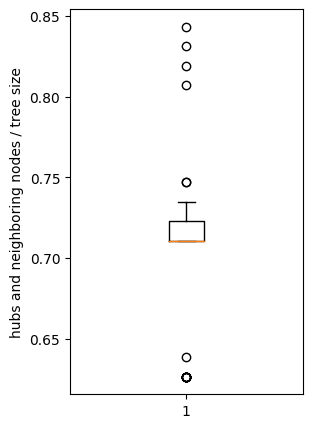

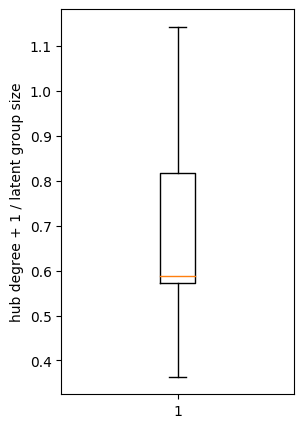

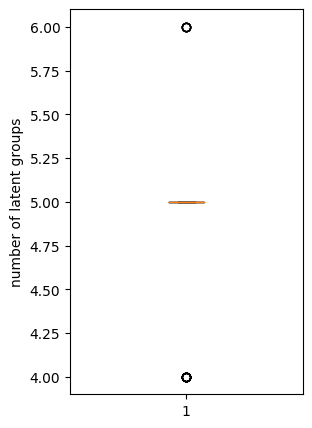

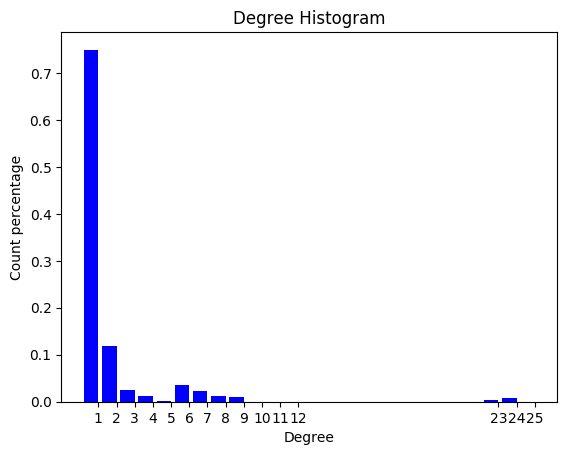

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,5))
typical_group_hub_vs_size, \
typical_group_hub_vs_hub_size,\
typical_latent_group_count,\
typical_degree_hist_sum = \
    get_hub_vs_size (
    len(typical_group), 
    leave_one_typical_hubs, 
    leave_one_typical_mst, 
    leave_one_typical_latent_groups)

plt.boxplot (typical_group_hub_vs_size)
plt.ylabel('hubs and neighboring nodes / tree size')
plt.show()
plt.figure(figsize=(3,5))
plt.boxplot (typical_group_hub_vs_hub_size)
plt.ylabel('hub degree + 1 / latent group size')
plt.show()
plt.figure(figsize=(3,5))
plt.boxplot(typical_latent_group_count)
plt.ylabel('number of latent groups')
plt.show()
plot_deg_count(typical_degree_hist_sum)
plt.show()


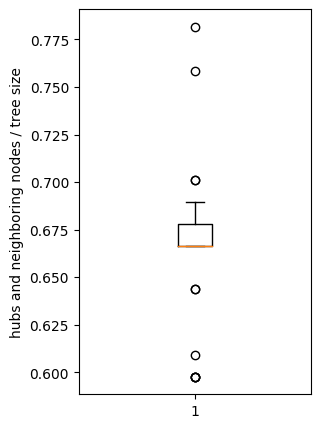

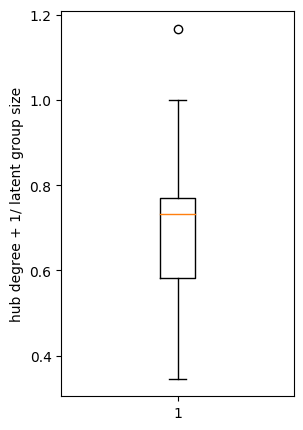

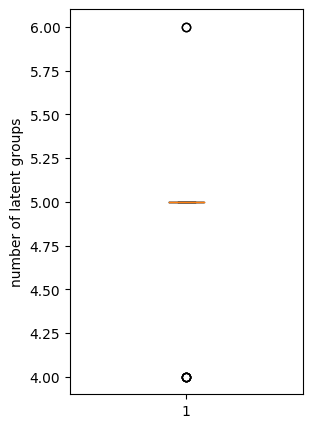

<Figure size 300x500 with 0 Axes>

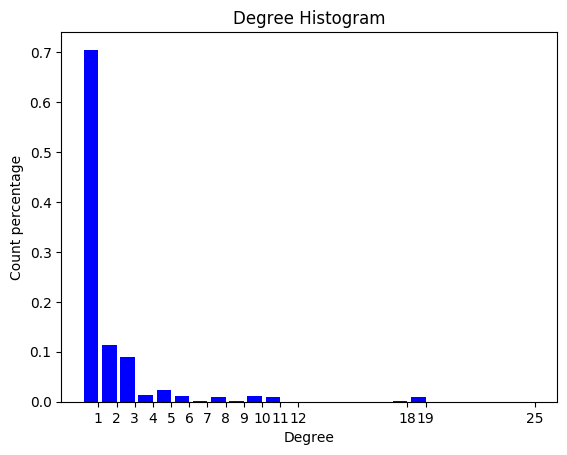

In [11]:
a1a3_group_hub_vs_size, \
a1a3_group_hub_vs_hub_size,\
a1a3_latent_group_count ,\
a1a3_degree_hist_sum = \
    get_hub_vs_size (
    len(a1a3_group), 
    leave_one_a1a3_hubs, 
    leave_one_a1a3_mst, 
    leave_one_a1a3_latent_groups)
plt.figure(figsize=(3,5))
plt.boxplot (a1a3_group_hub_vs_size)
plt.ylabel('hubs and neighboring nodes / tree size')
plt.show()
plt.figure(figsize=(3,5))
plt.boxplot (a1a3_group_hub_vs_hub_size)
plt.ylabel('hub degree + 1/ latent group size')
plt.show()
plt.figure(figsize=(3,5))
plt.boxplot(a1a3_latent_group_count)
plt.ylabel('number of latent groups')
plt.show()
plt.figure(figsize=(3,5))
plot_deg_count(a1a3_degree_hist_sum)
plt.show()